# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [303]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy.stats import levene

### Dataset Loading

In [2]:
# Load Dataset

data = pd.read_csv('TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [3]:
# Dataset First Look
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
data.shape

(381109, 12)

### Dataset Information

In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
duplicates = data.duplicated().sum()
print(f'Number of duplicate rows in the dataset: {duplicates}')

Number of duplicate rows in the dataset: 0


#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
missing_values = data.isnull().sum()
print(f'Missing values in the dataset:\n{missing_values}.')

Missing values in the dataset:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64.


Text(0.5, 1.0, 'Bar Plot of Missing Values in the Dataset')

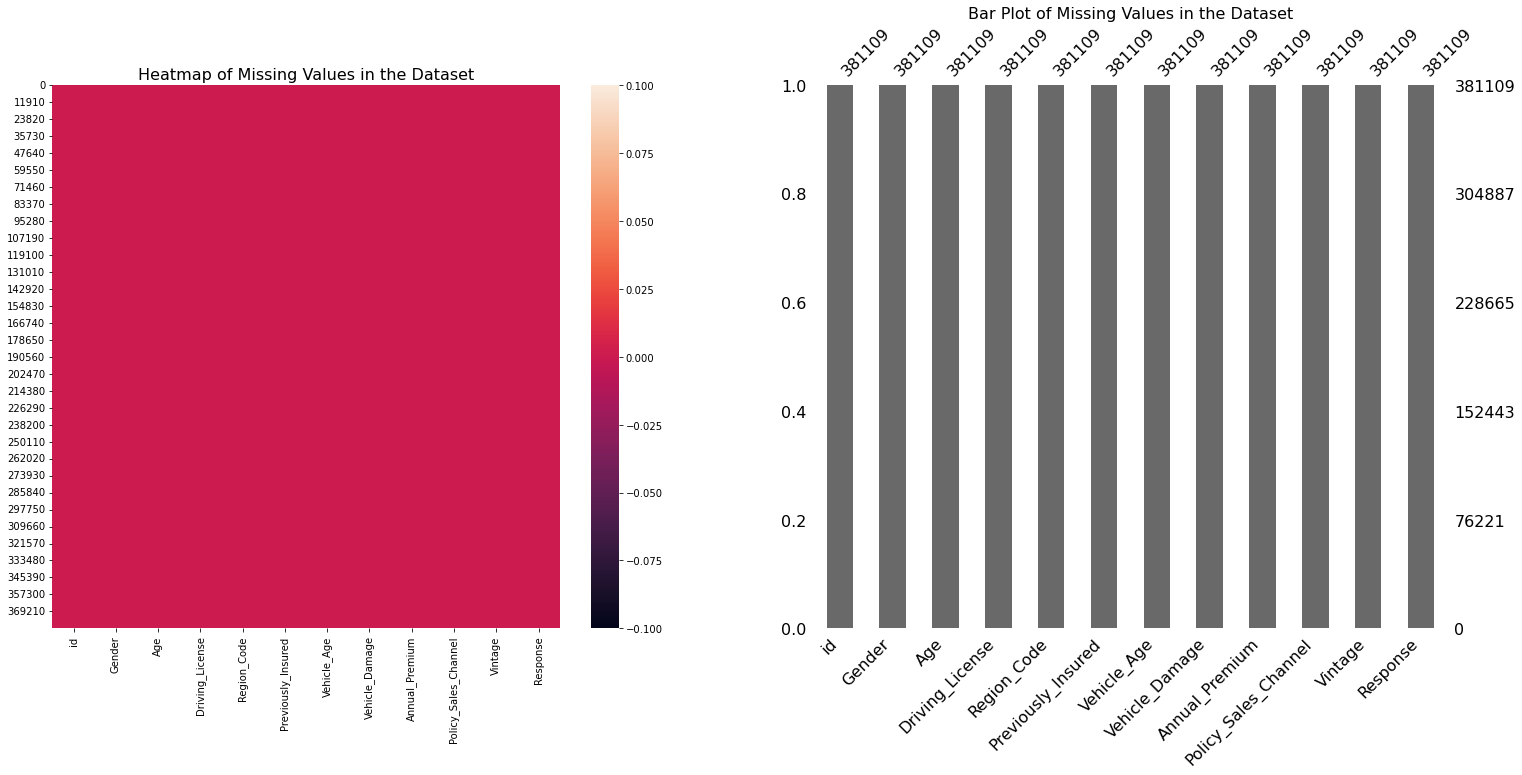

In [20]:
# Visualizing the missing values

plt.figure(figsize=(12,6))

# Heatmap showing the distribution of null values in the entire dataset.
plt.subplot(121)
sns.heatmap(data.isnull())
plt.title('Heatmap of Missing Values in the Dataset', fontsize=16)

# Bar chart displaying the count of non null values.
plt.subplot(122)
msno.bar(data)
plt.title('Bar Plot of Missing Values in the Dataset', fontsize=16)


From the above visualization, we can see that there are no missing or duplicate values in the dataset.

### What did you know about your dataset?

The dataset contains information about customers, their deographics, vehicle details and vehicle insurance premium to understand whether the policyholders (customers) from past year who had bought health insurance will also be interested in Vehicle Insurance provided by the company.

## ***2. Understanding Your Variables***

In [21]:
# Dataset Columns

data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [22]:
# Dataset Describe

data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

> **ID:** (Continuous) - Unique identifier for the Customer.

> **Age:** (Continuous) - Age of the Customer.

> **Gender:** (Dichotomous) - Gender of the Customer.

>  **Driving_License:** (Dichotomous) - 0 for customer not having DL, 1 for customer having DL.

> **Region_Code:** (Nominal) - Unique code for the region of the customer.

> **Previously_Insured:** (Dichotomous) - 0 for customer not having vehicle insurance, 1 for customer having vehicle insurance.

> **Vehicle_Age:** (Nominal) - Age of the vehicle.

> **Vehicle_Damage:** (Dichotomous) - Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

> **Annual_Premium:** (Continuous) - The amount customer needs to pay as premium in the year.

> **Policy_Sales_Channel:** (Nominal) - Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

> **Vintage:** (Continuous) - Number of Days, Customer has been associated with the company.

> **Response (Dependent Feature):** (Dichotomous) - 1 for Customer is interested, 0 for Customer is not interested. 

### Check Unique Values for each variable.

In [23]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
    print(f'Number of unique values in {i} is {data[i].nunique()}')

Number of unique values in id is 381109
Number of unique values in Gender is 2
Number of unique values in Age is 66
Number of unique values in Driving_License is 2
Number of unique values in Region_Code is 53
Number of unique values in Previously_Insured is 2
Number of unique values in Vehicle_Age is 3
Number of unique values in Vehicle_Damage is 2
Number of unique values in Annual_Premium is 48838
Number of unique values in Policy_Sales_Channel is 155
Number of unique values in Vintage is 290
Number of unique values in Response is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

From the initial steps, we know that there are no missing values or duplicate rows in our dataset. Hence, we do not need to do any manipulation regarding these two aspects.  
However, there are some features which we may not need for our analysis. Let us go ahead and identify those features and if required, remove those from our dataset.

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Count'>

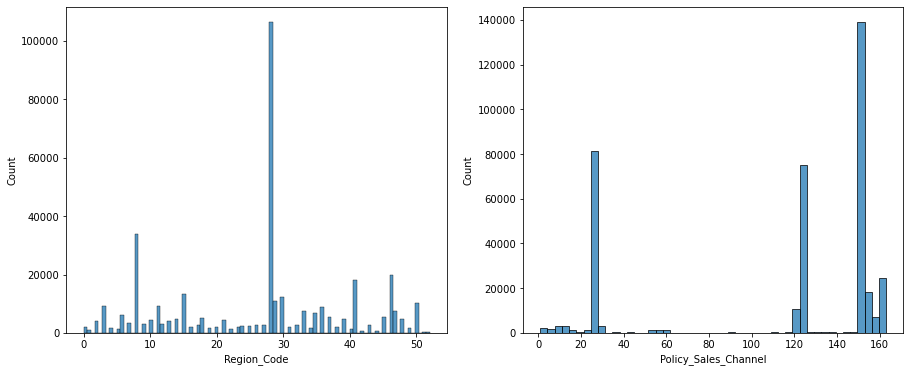

In [96]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(x='Region_Code', data=data)

plt.subplot(1,2,2)
sns.histplot(x='Policy_Sales_Channel', data=data)

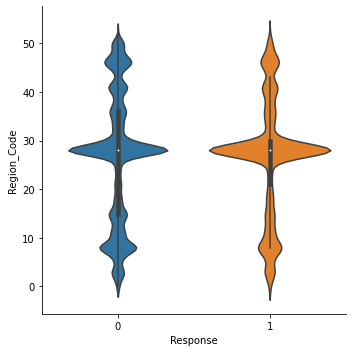

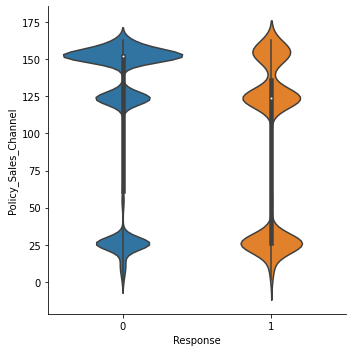

In [107]:
# Let us see the distribution of the "Region_Code" and "Policy_Sales_Channel" w.r.t."Response" to understand its despersion.

sns.catplot(x='Response', y='Region_Code', data=data, kind='violin')

sns.catplot(x='Response', y='Policy_Sales_Channel', data=data, kind='violin')

We can drop the "id" column as it is just a unique idenfier of each customer and is not significant to our analysis.  
The number of customers belonging to different "Region_Code" and opting for different "Policy_Sales_Channel" are quite spread out and do not make much sense. So, we can convert these two features into categorical values based on the customer count (frequency) belonging to that Region or opting for the Channel.
    
To convert to categorical values, we need to decide on the threshold values for customer count belonging to different categories.

Based on the histogram, we can create thresholds as follows:

> **Policy_Sales_Channel**  
$>$ 100000: Channel_A  
70001 to 100000: Channel_B  
10001 to 70000: Channel_C  
$\leq$ 10000: Channel_D  

> **Region_Code**  
$>$ 100000: Region_A  
10001 to 100000: Region_B  
$\leq$ 10000: Region_C  

In [35]:
# Drop "id" column
data = data.drop('id', axis=1)
data.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response',
       'Policy_Sales_Channel_Categorical', 'Region_Code_Categorical'],
      dtype='object')

In [36]:
# Convert "Policy_Sales_Channel" to categorical values.
x = data['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if 70000<x<=100000 else 'Channel_C' if 10000<x<=70000 else 'Channel_D') 
mapping_dict = dict(zip(x.keys(),x.values))
data['Policy_Sales_Channel_Categorical'] = data['Policy_Sales_Channel'].map(mapping_dict) 

In [79]:
# Convert "Region_Code" to categorical values.
x = data['Region_Code'].value_counts().apply(lambda x: 'Region_A' if x>100000 else 'Region_B' if 10000<x<=100000 else 'Region_C' if 5000<x<=10000 else 'Region_D') 
mapping_dict = dict(zip(x.keys(),x.values))
data['Region_Code_Categorical'] = data['Region_Code'].map(mapping_dict) 

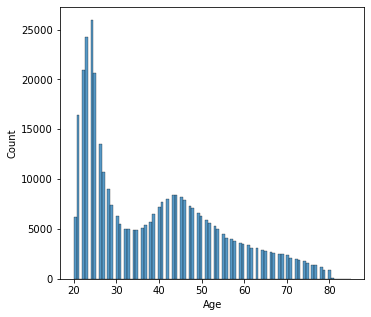

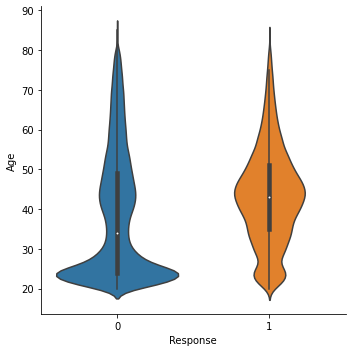

In [109]:
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.histplot(x='Age', data=data)

sns.catplot(x='Response', y='Age', data=data, kind='violin')


Next we can name the age categories in a manner that is easy to interpret.

> **Age Categories**  
20 to 40: YoungAge  
41 to 65: MiddleAge  
$>$ 65: Old Age  

In [57]:
# Categorizing Age
data['Age_Category'] = data['Age'].apply(lambda x: 'YoungAge' if 20<x<=40 else 'MiddleAge' if 40<x<=65 else 'OldAge')

In [80]:
# Let us check the number of unique regions / channels are present in the converted numerical variables.
print(data.groupby('Policy_Sales_Channel_Categorical')['Policy_Sales_Channel'].nunique())
print()
print(data.groupby('Region_Code_Categorical')['Region_Code'].nunique())
print()
print(data.groupby('Age_Category')['Age'].nunique())

Policy_Sales_Channel_Categorical
Channel_A      1
Channel_B      2
Channel_C      2
Channel_D    150
Name: Policy_Sales_Channel, dtype: int64

Region_Code_Categorical
Region_A     1
Region_B     7
Region_C    10
Region_D    35
Name: Region_Code, dtype: int64

Age_Category
MiddleAge    25
OldAge       21
YoungAge     20
Name: Age, dtype: int64


In [81]:
# Let us check the number of customers belonging to each of these categories.
print(data['Policy_Sales_Channel_Categorical'].value_counts())
print()
print(data['Region_Code_Categorical'].value_counts())
print()
print(data['Age_Category'].value_counts())

Channel_B    153695
Channel_A    134784
Channel_D     60190
Channel_C     32440
Name: Policy_Sales_Channel_Categorical, dtype: int64

Region_B    118696
Region_A    106415
Region_D     84147
Region_C     71851
Name: Region_Code_Categorical, dtype: int64

YoungAge     210392
MiddleAge    136416
OldAge        34301
Name: Age_Category, dtype: int64


Majority of the customers only belong to specific regions and opt for certain specific channels.


In [135]:
# Let us also have a look at the Driving_Lincense column to determine if this feature has any impact on the "Response".
data.groupby('Driving_License')['Response'].value_counts()

Driving_License  Response
0                0              771
                 1               41
1                0           333628
                 1            46669
Name: Response, dtype: int64

We can see that the the proportion of customers who do not have a driving license (DL) is very small, about 0.21% and out of that only 41 have opted for vehicle insurance, which is a very small value. Customers opting for insurance without a driving license could be those who are expecting to get a license soon and hence would eventually be categorized in the category of having a DL.

Hence, since mostly customers with a DL would be interested in purchasing a vehicle insurance, we can drop the DL column as it does not provide any meaningful information.

Let us create a copy of the dataset and drop the columns "Age", "Driving_License", "Region_Code" and "Policy_Sales_Channel" as we have converted those to meaningful categorical values.

In [137]:
# Create a copy of the dataset.
data1 = data.copy()

In [138]:
# Drop the columns "Region_Code" and "Policy_Sales_Channel".
data1 = data1.drop(['Age', 'Driving_License', 'Region_Code', 'Policy_Sales_Channel'], axis=1)

In [139]:
# Final list of columns and data view

data1.columns

Index(['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Annual_Premium', 'Vintage', 'Response',
       'Policy_Sales_Channel_Categorical', 'Region_Code_Categorical',
       'Age_Category'],
      dtype='object')

In [140]:
data1.head()

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Policy_Sales_Channel_Categorical,Region_Code_Categorical,Age_Category
0,Male,0,> 2 Years,Yes,40454.0,217,1,Channel_B,Region_A,MiddleAge
1,Male,0,1-2 Year,No,33536.0,183,0,Channel_B,Region_C,OldAge
2,Male,0,> 2 Years,Yes,38294.0,27,1,Channel_B,Region_A,MiddleAge
3,Male,1,< 1 Year,No,28619.0,203,0,Channel_A,Region_C,YoungAge
4,Female,1,< 1 Year,No,27496.0,39,0,Channel_A,Region_B,YoungAge


In [141]:
data1['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

We see that only about 12% customers out of the total have agreed to take the vehicle insurance.  
Let us analyze the reasons of why this 12% have agreed to take the insurance and why the rest 88% have not agreed.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [142]:
# Chart - 1 visualization code

data1.columns

Index(['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Annual_Premium', 'Vintage', 'Response',
       'Policy_Sales_Channel_Categorical', 'Region_Code_Categorical',
       'Age_Category'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x173036a0430>,
 [Text(-1.0194600325954544, 0.41316006818238765, '1'),
  Text(1.0194600325954544, -0.4131600681823878, '0')],
 [Text(-0.5560691086884296, 0.22536003719039324, '87.7%'),
  Text(0.5560691086884296, -0.22536003719039333, '12.3%')])

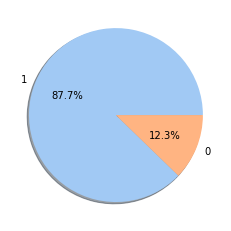

In [143]:
# Let us first see the distribution of how many customers have agreed to take the vehicle insurance.

colors = sns.color_palette('pastel')[0:2]
plt.pie(x=data1["Response"].value_counts().values, labels=data1["Response"].unique(), colors=colors,autopct='%1.1f%%', shadow=True)

We can see that only 12.3% of the customers are interested in purchasing the vehicle insurance. Hence, it is important to analyze the data for separately for each of the "Response" classes.

Since "Response" tells us whether customers are interested in the vehicle insurance or not, let us explore the data w.r.t. "Response" on the basis of the following:
1. Demographics: Gender, Age_Category, Region_Code_Categorical
2. Vehicle Characteristics: Vehicle_Age, Vehicle_Damage
3. Insurance: Previously_Insured, Annual_Premium   
4. Association with the company: Vintage, Policy_Sales_Channel_Categorical

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

([<matplotlib.patches.Wedge at 0x1742e3173d0>,
 [Text(-0.14047625142251505, 1.0909933193133121, 'Male'),
  Text(0.14047625142251538, -1.0909933193133121, 'Female')],
 [Text(-0.07662340986682638, 0.5950872650799883, '54.1%'),
  Text(0.07662340986682657, -0.5950872650799883, '45.9%')])

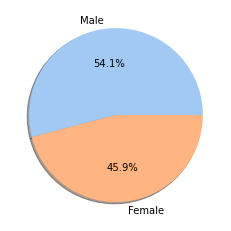

In [259]:
colors = sns.color_palette('pastel')[0:2]
plt.pie(x=data1["Gender"].value_counts().values, labels=data1["Gender"].unique(), colors=colors,autopct='%1.1f%%', shadow=True)

#### Chart - 2

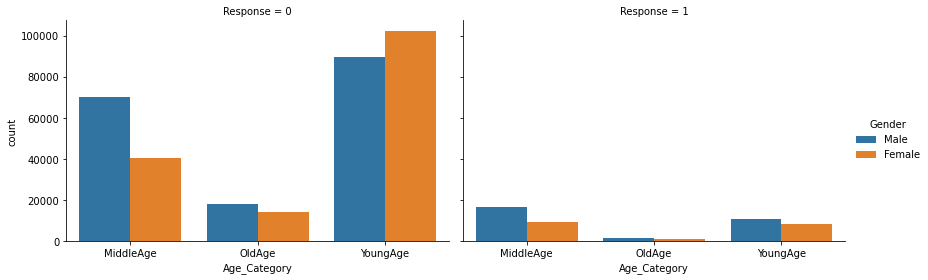

In [130]:
# Chart - 2 visualization code

sns.catplot(x='Age_Category', data=data1, kind='count', hue='Gender', col='Response',\
            height=4, aspect=1.5, col_wrap=2)
plt.show()

For customers who are interested, males are more than females in all age groups.  
For customers who are not interested, males are more than females in all age groups except "YoungAge" where females are higher. 

Customers in the middle age group are more interested in buying the insurance among all the age categories as these customers have a higher proportion in the 'interested' reponse and lower proportion in the 'not interested' response.  
It is however also important to note that even though the middle age group has the highest proportion, the young age group has also shown some interest in buying the insurance.

Conclusion:
As a first step, the company should focus on Middle Aged, Male customers, then on Young, Male customers, then on Female customers in both the categories and lastly on Old Aged customers.

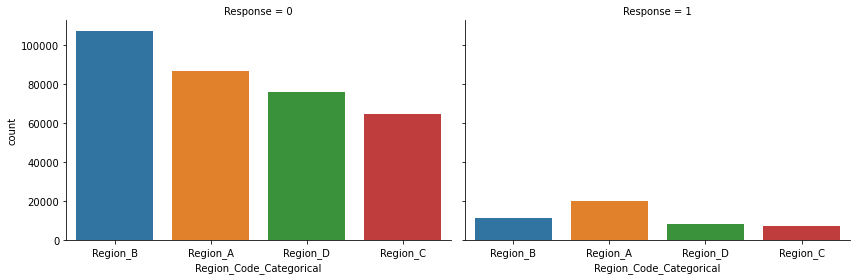

In [145]:
# Analysis on the basis on "Region_Code_Categorical".

order = data1['Region_Code_Categorical'].value_counts().index
sns.catplot(x='Region_Code_Categorical', data=data1, kind='count', col='Response',\
            height=4, aspect=1.5, col_wrap=2, order=order)
plt.show()

The highest number of customers however come from Region_A and Region_B and these customers have also shown the most interest, followed by Region_C and D customers equally.

Conclusion: The company should focus on customers in Region_A and B first and then on Region C and D as they have a higher chance of being prospective customers. 

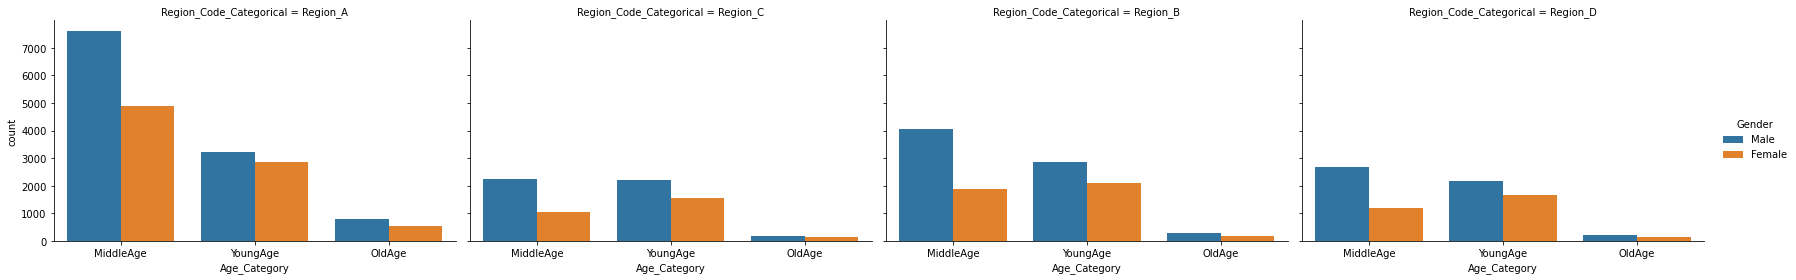

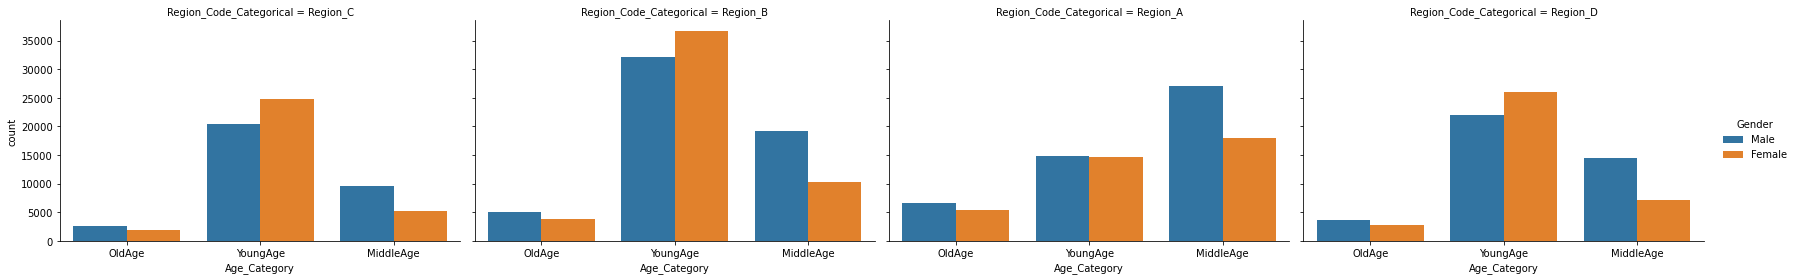

In [157]:
sns.catplot(x='Age_Category', data=data1[data1["Response"]==1], kind='count', hue='Gender', col='Region_Code_Categorical',\
            height=4, aspect=1.5, col_wrap=4)
# plt.title('Distribution of Demographics for Customers who are Interested')

sns.catplot(x='Age_Category', data=data1[data1["Response"]==0], kind='count', hue='Gender', col='Region_Code_Categorical',\
            height=4, aspect=1.5, col_wrap=4)
# plt.title('Distribution of Demographics for Customers who are Not Interested')

Recommendation: From the above plot which shows the distribution of Age, Gender and Region w.r.t. the customer Response, we can suggest to the company that based on the Demographics alone, the company should first focus on Middle-Aged, Male customers in Regions A and B, then move to the Young and Middle-Aged Male customers in Regions C and D.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

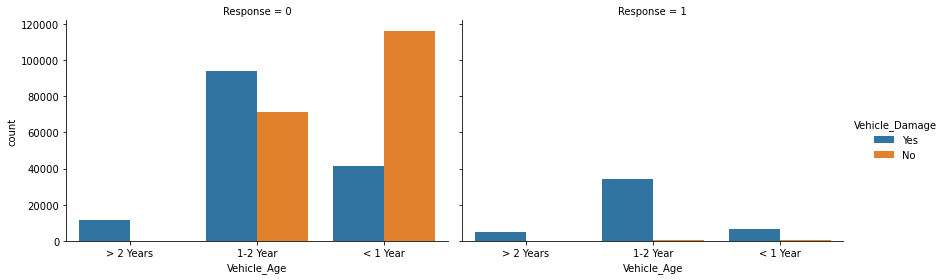

In [159]:
sns.catplot(x='Vehicle_Age', data=data1, kind='count', hue='Vehicle_Damage', col='Response',\
            height=4, aspect=1.5, col_wrap=2)

For customers who are interested in the insurance have mostly had vehicle damage and whose vehicle age is between 1-2 years.  
However, there is also a significant number of customers who have had vehicle damage with 1-2 years of vehicle age but have not shown interest at present.

Recommendation: The company should focus on and try to approach and capture customers who have had vehicle damage and whose vehicle is about 1-2 years old as these are most likely to purchase the insurance. And then focus on customers with vehicle age of < 1 year. Customers with vehicle age > 2 years is not very large and would most likely have an already running insurance, so the company need not focus its resources on this group at present.

<AxesSubplot:xlabel='Response', ylabel='Annual_Premium'>

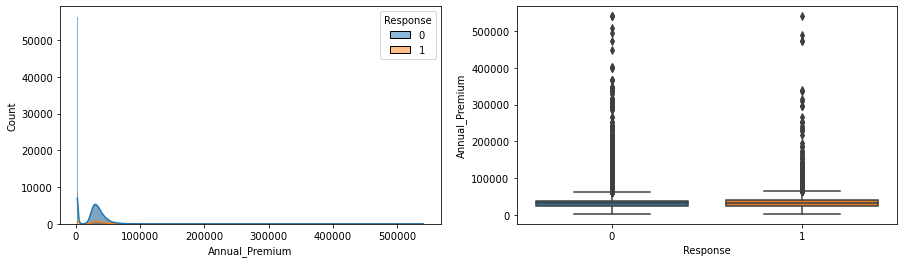

In [164]:
# Let us first analyze the distribution Annual Premium using a histogram and boxplot.

plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(x="Annual_Premium", data=data1, kde=True, hue="Response")

plt.subplot(122)
sns.boxplot(x="Response", y="Annual_Premium", data=data1)

From the above plots, it can be observed that the "Annual_Premium" data is highly positively skewed and there are also many outliers.  

Let us calculate the proportion of outliers to help us gauge the extent of the same. A quick visual check indicates that most of the premium data falls in the region of 0 to 80000. So, let us use this as a threshold to calculate the proportion of outliers. 

Also, let us calculate the proportion of total amount of premium above 80000 and compare this against customers' interest in purchasing the policy. This analysis is important to seggregate high value and low value customers.

In [189]:
premium_outliers_prop_cust = (len(data1[data1["Annual_Premium"] > 80000]) / len(data1)) * 100
print(f"Proportion of customers with Annual Premium > 80000 (Outliers): {round(premium_outliers_prop_cust, 2)}%.")

premium_outliers_prop_amt = (data1.loc[data1["Annual_Premium"] > 80000, "Annual_Premium"].sum() / data1["Annual_Premium"].sum()) * 100
print(f"\nProportion of Annual Premium Amount > 80000 (Outliers): {round(premium_outliers_prop_amt, 2)}%.")

Proportion of customers with Annual Premium > 80000 (Outliers): 0.62%.

Proportion of Annual Premium Amount > 80000 (Outliers): 2.18%.


We can see that neither the proportion of total customers nor the proportion of high-value customers is significant. Hence, we can remove these outliers for the time being using the threshold of 80000 derived through our visual check and analyze the data accordingly.  

Note: Later, we will use more robust techniques such as IQR methods and min-max scaler to handle outliers and normalize our data respectively.

In [255]:
data_with_prem_below_80k = data1[data1["Annual_Premium"] <= 80000]
data_with_prem_below_80k.shape

(378744, 10)

Let us plot the histogram and boxplot again after removing the outliers.

<AxesSubplot:xlabel='Response', ylabel='Annual_Premium'>

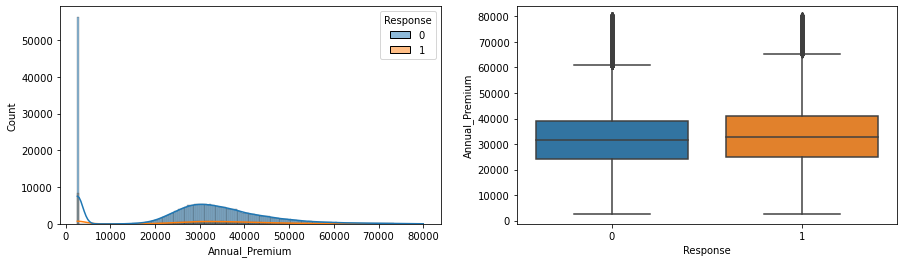

In [256]:
# Let us first analyze the distribution Annual Premium using a histogram and boxplot.

plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(x="Annual_Premium", data=data_with_prem_below_80k, kde=True, hue="Response")

plt.subplot(122)
sns.boxplot(x="Response", y="Annual_Premium", data=data_with_prem_below_80k)

It still seems that a large proportion of premium falls in the range of 0 to 5000 seen as the straight vertical line in the histogram. However, we will not process this further at present but we have to treat this before using this in the ML model training.

Now, based on the "Annual_Premium" above 80000 and "Previously_Insured" data, let us analyze the same w.r.t. "Response.

Text(0.5, 1.0, 'Distribution of Customers Previously Insured, their Mean Annual Premium and Response')

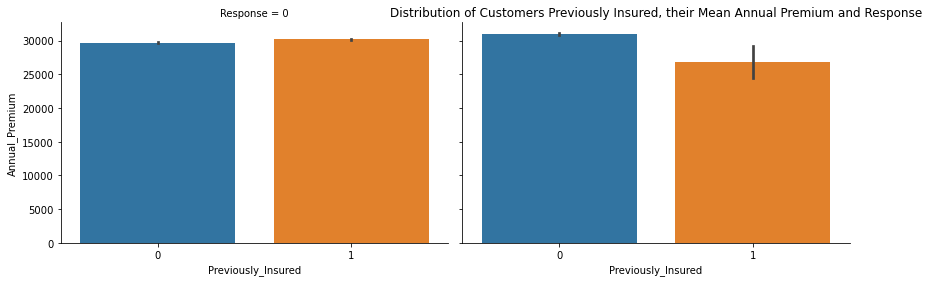

In [257]:
sns.catplot(x='Previously_Insured', y="Annual_Premium", data=data_with_prem_below_80k, kind='bar', col='Response',\
            height=4, aspect=1.5, col_wrap=2)
plt.title("Distribution of Customers Previously Insured, their Mean Annual Premium and Response")

Text(0.5, 0.98, 'Distribution of Customers Previously Insured and Response')

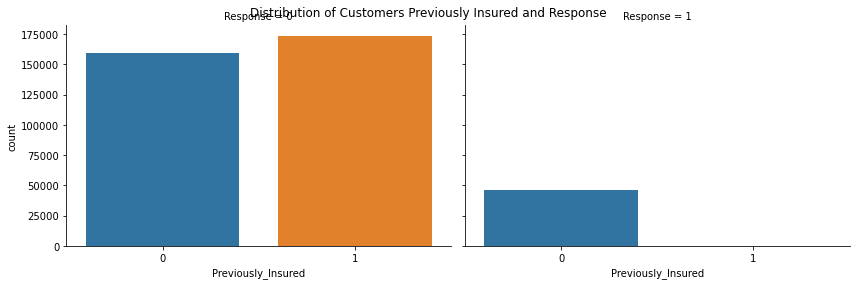

In [258]:
sns.catplot(x='Previously_Insured', data=data_with_prem_below_80k, kind='count', col='Response',\
            height=4, aspect=1.5, col_wrap=2)
plt.suptitle("Distribution of Customers Previously Insured and Response")

From the above two plots related to "Previously_Insured", "Annual_Premium" and "Response", we can observe that an extremely small proportion of customers who were previously insured have shown interest in purchasing the policy and for those customers, the average premium amount is less than the customers who have not been previously insured but have shown interest in buying the policy.  
Also, the average premium amount for customers who have not shown interest in the same irrespective of them being previously insured or not.  
Another interesting and worrying observation is that those who were previously insured and now not shown interest in buying the policy.

Recommendation: It seems that the customers are not happy with the insurance policy amount and service of the company as many customers who were previously insured with the company have failed to show interest in buying the policy (i.e. not repeat customers). This is a worrying scenario. The company needs contact first the previously insured customers and understand their concerns of why they have failed to be their repeat customers. Next, they need to focus on the customers who have shown interest but were not previously insured and offer some incentives to convert them from prospective to actual customers.

Now let us explore the distribution of customer's association with the company and their interest in insurance purchase.

Let us first again see the distribution of "Vintage" to understand the duration of customers' association. 

<AxesSubplot:xlabel='Response', ylabel='Vintage'>

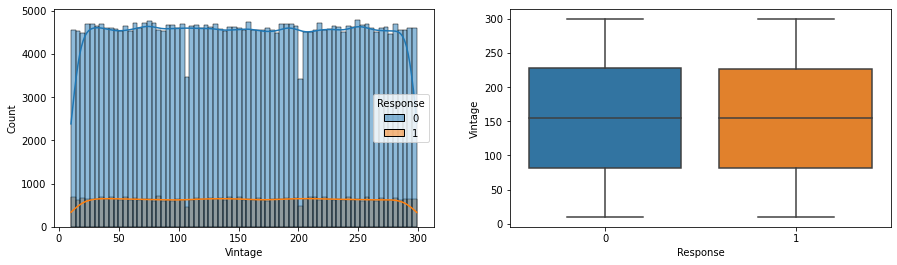

In [201]:
plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(x="Vintage", data=data1, kde=True, hue="Response")

plt.subplot(122)
sns.boxplot(x="Response", y="Vintage", data=data1)

The "Vintage" exhibits almost a uniform distribution and there do not seem to be any outliers too.

It can be inferred that the period of customer's association with the company does not have any impact on his response towards insurance purchase.

Let us now analyze the "Policy_Sales_Channel_Categorical" data to understand its distribution and relationship with customers' response.

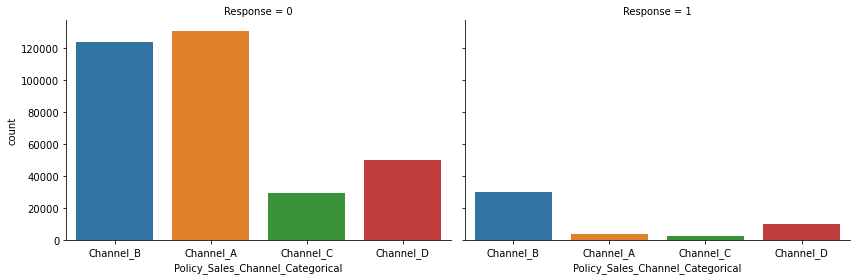

In [202]:
sns.catplot(x='Policy_Sales_Channel_Categorical', data=data1, kind='count', col='Response',\
            height=4, aspect=1.5, col_wrap=2)

In [206]:
# Let us revisit the number of unique channels in each category.
data.groupby("Policy_Sales_Channel_Categorical")["Policy_Sales_Channel"].nunique()

Policy_Sales_Channel_Categorical
Channel_A      1
Channel_B      2
Channel_C      2
Channel_D    150
Name: Policy_Sales_Channel, dtype: int64

From the above plot, it can be seen that "Channel_B" seems to be the most effective as the number of customers who have shown interest is the highest. Even though "Channel_D" is the second highest, it includes 150 channels, it maybe difficult and time consuming to identify the most effective channels amongst those 150.

Recommendation: The company should focus on maximum effective and efficient utilization of Channel B and try to convert the dis-interested customers into potential customers. Next the focus should be on effective Channel A utilization as this constitutes the second most widely used channel and inprove the conversion ratio.

To summarize, our analysis was divided into the following four distinct categories, viz:
1. Demographics: Gender, Age_Category, Region_Code_Categorical
2. Vehicle Characteristics: Vehicle_Age, Vehicle_Damage
3. Insurance: Previously_Insured, Annual_Premium   
4. Association with the company: Vintage, Policy_Sales_Channel_Categorical

Based on this, following is the summary of recommendations to the company for increasing the number the customers who would be interested in buying its vehicle insurance.

1. The company should first focus on Middle-Aged, Male customers in Regions A and B, then move to the Young and Middle-Aged Male customers in Regions C and D.
2. The company should focus on and try to approach and capture customers who have had vehicle damage and whose vehicle is about 1-2 years old as these are most likely to purchase the insurance. And then focus on customers with vehicle age of < 1 year. Customers with vehicle age > 2 years is not very large and would most likely have an already running insurance, so the company need not focus its resources on this group at present.
3. It seems that the customers are not happy with the insurance policy amount and service of the company as many customers who were previously insured with the company have failed to show interest in buying the policy (i.e. not repeat customers). This is a worrying scenario. The company needs contact first the previously insured customers and understand their concerns of why they have failed to be their repeat customers. Next, they need to focus on the customers who have shown interest but were not previously insured and offer some incentives to convert them from prospective to actual customers.
4. The company should focus on maximum effective and efficient utilization of Channel B and try to convert the dis-interested customers into potential customers. Next the focus should be on effective Channel A utilization as this constitutes the second most widely used channel and inprove the conversion ratio.

Based on this analysis alone, the company should focus on the customers with the following characteristics who have not shown interest in purchasing the insurance as they could have a high chance of being converted into potential customers.

1. Middle-Aged, Male, Regions A and B.
2. Have had Vehicle Damage with Vehicle Age 1-2 years.
3. Have been Previously Insured.
4. Contact through Policy Sales Channel B.

In [245]:
# Let us view the proportion of customers who have not shown interest with all the above mentioned characteristics.

reco_cust = data1[(data1["Response"]==0) & (data1["Age_Category"]=="MiddleAge") & (data1["Gender"]=="Male") & \
                  ((data1["Region_Code_Categorical"]=="Region_A") | (data1["Region_Code_Categorical"]=="Region_B")) & \
                  (data1["Vehicle_Damage"]=="Yes") & (data1["Vehicle_Age"]=="1-2 Year") & (data1["Previously_Insured"]==1) & \
                  (data1["Policy_Sales_Channel_Categorical"]=="Channel_B")]

print(f"Number of customers to be approached - Level 1: {len(reco_cust)}")

Number of customers to be approached - Level 1: 1194


The company should identify these 1194 customers first and approach them as they have a high likelihood of becoming potential customers. Then based on the recommendations above, the next subset (Level 2) customers should be approached and so on.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [250]:
# Correlation Heatmap visualization code

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Gender                            381109 non-null  object 
 1   Previously_Insured                381109 non-null  int64  
 2   Vehicle_Age                       381109 non-null  object 
 3   Vehicle_Damage                    381109 non-null  object 
 4   Annual_Premium                    381109 non-null  float64
 5   Vintage                           381109 non-null  int64  
 6   Response                          381109 non-null  int64  
 7   Policy_Sales_Channel_Categorical  381109 non-null  object 
 8   Region_Code_Categorical           381109 non-null  object 
 9   Age_Category                      381109 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 29.1+ MB


<AxesSubplot:>

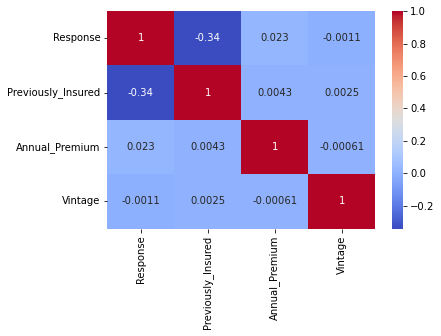

In [252]:
numeric_features=["Response", "Previously_Insured", "Annual_Premium", "Vintage"]

sns.heatmap(data=data1[numeric_features].corr(), cmap="coolwarm", annot=True)

There is no significant correlation amongst any of the numeric features, hence we will keep all of them.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

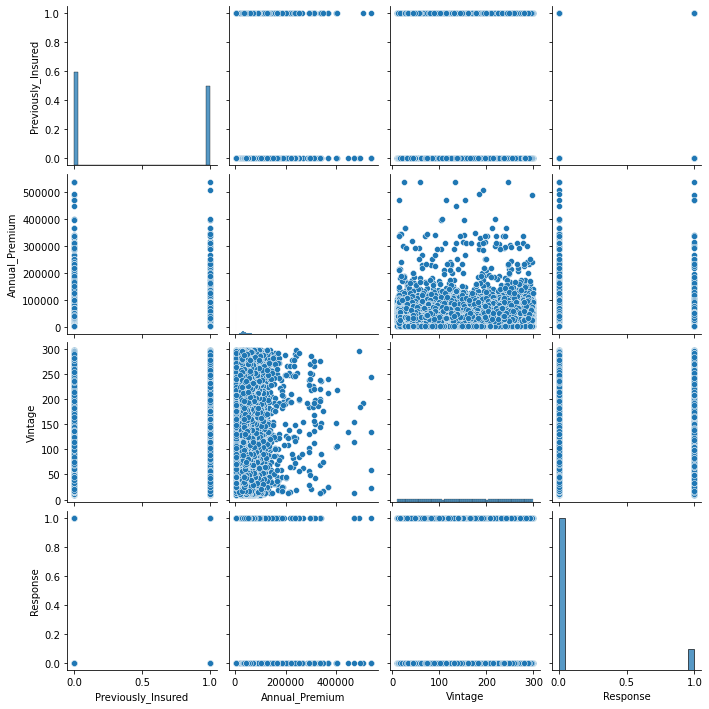

In [253]:
# Pair Plot visualization code
sns.pairplot(data=data1)

The pair plot does not give us any additional information. The only observation is that irrespective of the Vintage, i.e. the number of days association with the company, the Annual Premium is mostly concentrated in the range of 0 to 80000 which is what we have already observed and noted earlier.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

We noticed in the EDA that "Vintage" seems to follow a Uniform Distribution. This means that "Vintage" has no effect on the "Response" feature, i.e. whatever may be the duration of association of customers with the company, their interest in purchasing or not purchasing the insurance remains the same.

To test whether this observation holds true, let us test the hypothesis that "Vintage" follows a Uniform Distribution.

Formulate the Hypothesis:  
$H_0$: "Vintage" follows a Uniform Distribution.  
$H_a$: "Vintage" does not follow a Uniform Distribution.

Visualizing "Vintage" distribution of data.

<AxesSubplot:xlabel='Vintage', ylabel='Count'>

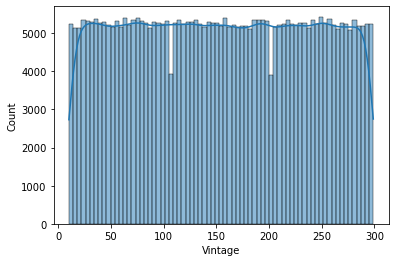

In [262]:
sns.histplot(x="Vintage", data=data1, kde=True)

#### 2. Perform an appropriate statistical test.

Chi-Square Test: The chi-square goodness-of-fit test can be used to test whether the observed frequency distribution of your data matches a specified theoretical distribution, such as a uniform distribution.

Hence, we will use the Chi-Square Test to test our hypothesis of whether the "Vintage" data follows a Uniform Distribution.

Formula to calculate the Chi-Square Statistic:  
$\chi^2 = \Sigma_{i=1}^k \frac {(O_i-E_i)^2}{E_i}$  
where:  
$O_i$ = Observed frequency in bin $i$  
$E_i$ = Expected frequency in bin $i$  
$k$ = Number of bins

In [331]:
# Define bins
num_bins = 5
bins = np.linspace(min(data1["Vintage"]), max(data1["Vintage"]), num_bins + 1)

# Count observations in each bin
observed, _ = np.histogram(data1["Vintage"], bins=bins)

# Calculate expected frequency for each bin under uniform distribution
expected = len(data1["Vintage"]) / num_bins

# Calculate chi-square statistic
chi2_stat = sum((observed - expected)**2 / expected)

# Determine degrees of freedom
df = num_bins - 1

# Calculate p-value
p_val = 1 - chi2.cdf(chi2_stat, df)

# Print results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)

# Compare chi-square statistic with critical value at chosen significance level
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, df=df)
print("Critical Value:", critical_value)

# Test the Hypothesis and print the Result
if chi2_stat > critical_value:
    print("\nReject the null hypothesis: Data does not follow a uniform distribution.")
else:
    print("\nFail to reject the null hypothesis: Data follows a uniform distribution.")


Chi-Square Statistic: 3.0882608387626638
P-value: 0.5431653411434854
Critical Value: 9.487729036781154

Fail to reject the null hypothesis: Data follows a uniform distribution.


##### Which statistical test have you done to obtain P-Value?

We performed the Ch-Square Test to test our Hypothesis and obtain the P-Value.

Conclusion: The P-Value > Significance level ($\alpha$) of 0.05. Hence, we failed to reject the null hypothesis and conclude that the "Vintage" data indeed follows a Uniform Distribution implying that "Vintage" which is the number of days the customers have been associated with the company does not have any effect on the customers' Response.

Note: We can consider dropping this variable later when training the ML Model.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

In the EDA, we noticed that the Annual_Premium data is heavily positively skewed. Let us test the hypothesis whether this data follows a Normal Distribution or not using the Shapiro-Wilk Test.  

Based on the result of this hypothesis test, we will conduct our next hypothesis test and decide whether the data needs to be transformed or not.

Formulate the Hypothesis:  
$H_0$: "Annual_Premium" follows a Normal Distribution.  
$H_a$: "Annual_Premium" does not follow a Normal Distribution.

#### 2. Perform an appropriate statistical test.

In [330]:
# Perform Statistical Test to obtain P-Value

# Get the data
ann_premium = data1["Annual_Premium"]

# Check Normality using Shapiro-Wilk test
_, p_value = shapiro(ann_premium)

# Print p_value
print(f"P-value: {p_value}")

# Test the Hypothesis
alpha = 0.05

if p_value < alpha:
    print("\nReject the null hypothesis: Data does not follow a normal distribution.")
else:
    print("\nFail to reject the null hypothesis: Data follows a normal distribution.")

P-value: 0.0

Reject the null hypothesis: Data does not follow a normal distribution.


##### Which statistical test have you done to obtain P-Value?

We used the Shapiro-Wilk Test to test whether the "Annual_Premium" data follows a Normal Distribution. The test confirms that the data is not normally distributed as we could also gauge from our visualization earlier that the data is heavily positively skewed.

Note: Before performing any further tests such as t-test or analysis, this data needs to be transforemed.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

We noticed in the EDA that the Mean Annual Premium amount of customers with Response=0 and Response=1 is not very different. Let us test the Hypothesis to check whether the difference in Annual Premium for these two categories of customers is statistically significant.

<AxesSubplot:xlabel='Response', ylabel='Annual_Premium'>

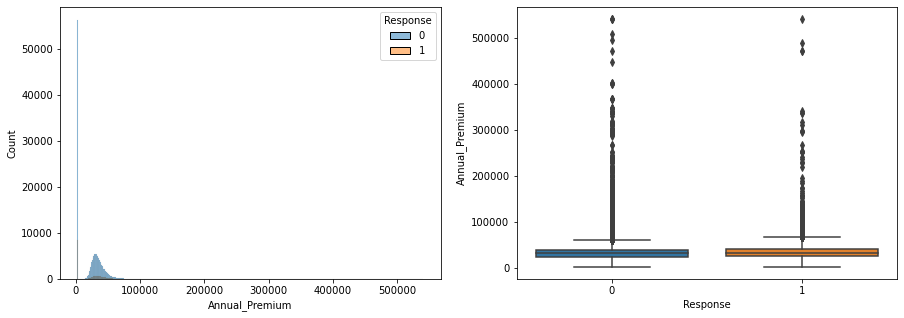

In [282]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.histplot(x="Annual_Premium", data=data1, hue="Response")

plt.subplot(122)
sns.boxplot(x="Response", y="Annual_Premium", data=data1)

#### 2. Perform an appropriate statistical test.

To test our Hypothesis that the Mean Annual Premium between the two categories of Response is the same, we will perform the standard independent samples t-test (if variances of data in the two categories is equal) otherwise Welch's t-test (if variances are unequal).

However, to do this we need to satisfy the following two assumptions:
1. Normally Distributed Data: The annual premium data within each category should ideally follow a normal distribution. While the t-test is robust to violations of normality, deviations may impact the test's accuracy, especially with small sample sizes.  
2. Homogeneity of Variance (Equal Variances): The variances of the annual premium data in the two categories should be equal. This assumption is crucial for the standard t-test; however, Welch's t-test can handle unequal variances.

Formulate the Hypothesis:  
$H_0$: The Mean Annual Premium for both Categories viz. Response=0 and Response=1 is the same.  
$H_a$: The Mean Annual Premium for both Categories viz. Response=0 and Response=1 is different.

In [328]:
# Perform Statistical Test to obtain P-Value

# Separate data by target variable categories
res_cat_0 = data1[data1["Response"] == 0]["Annual_Premium"]
res_cat_1 = data1[data1["Response"] == 1]["Annual_Premium"]

# Check Assumption 1: Normality using Shapiro-Wilk test which we already checked in Hypothesis 2 and concluded that the data is not normally distributed.
# Hence, we will transform the data using box-cox transformation.
# _, p_value_0 = shapiro(res_cat_0)
# _, p_value_1 = shapiro(res_cat_1)

# # If p-value < 0.05, data is not normally distributed, apply transformation
# if p_value_0 < 0.05:
#     res_cat_0, _ = boxcox(res_cat_0)
#     print(f"Assumption 1: The data for Response=0 is not Normally Distributed and hence is now Transformed.")
# else:
#     print(f"Assumption 1: The data for Response=0 is Normally Distributed.")
    
# if p_value_1 < 0.05:
#     res_cat_1, _ = boxcox(res_cat_1)
#     print(f"Assumption 1: The data for Response=1 is not Normally Distributed and hence is now Transformed.")
# else:
#     print(f"Assumption 1: The data for Response=1 is Normally Distributed.")


res_cat_0, _ = boxcox(res_cat_0)
res_cat_1, _ = boxcox(res_cat_1)

    
# Check Assumption 2: Homogeneity of Variances using Levene's test
_, p_value_var = levene(res_cat_0, res_cat_1)


# Perform t-test
t_statistic, p_value = ttest_ind(res_cat_0, res_cat_0, equal_var=(True if p_value_var > 0.05 else False))

# Print results
print("T-test statistic:", t_statistic)
print("P-value:", p_value)

# Compare p-value with significance level to make a decision
alpha = 0.05
if p_value < alpha:
    print("\nReject null hypothesis: Mean annual premiums are different.")
else:
    print("\nFail to reject null hypothesis: Mean annual premiums are the same.")



T-test statistic: 0.0
P-value: 1.0

Fail to reject null hypothesis: Mean annual premiums are the same.


##### Which statistical test have you done to obtain P-Value?

We perfomed Welch's t-test which is a robust t-test that can handle unequal variances. To perform Welch's t-test, we first transformed the "Annual_Premium" data to satisfy the condition of Normality and then calculated the t-statistic and p-value.

The P-Value obtained > Significance level ($\alpha$) of 0.05, hence we failed to reject the null hypothesis and conclude that the mean annual premium for customers in both categories is the same.

##### Why did you choose the specific statistical test?

Since there is no statistically significant difference in the mean annual premium between the two categories, we can conclude that the mean annual premium remains the same irrespective of the customers' response i.e., annual premium has no effect on customers' response.

Note: Later we can consider dropping this feature while building our prediction model.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Note: Since we have already done pre-processing of the dataset earlier, the details for missing values will be displayed below for both the original, un-processed dataset and the processed dataset.

In [336]:
# Handling Missing Values & Missing Value Imputation

# Original dataset
print("Missing Values in Original Dataset:")
print(data.isnull().sum())

# Processed Dataset
print("\nMissing Values in Processed Dataset:")
print(data1.isnull().sum())


Missing Values in Original Dataset:
Gender                              0
Age                                 0
Driving_License                     0
Region_Code                         0
Previously_Insured                  0
Vehicle_Age                         0
Vehicle_Damage                      0
Annual_Premium                      0
Policy_Sales_Channel                0
Vintage                             0
Response                            0
Policy_Sales_Channel_Categorical    0
Region_Code_Categorical             0
Age_Category                        0
dtype: int64

Missing Values in Processed Dataset:
Gender                              0
Previously_Insured                  0
Vehicle_Age                         0
Vehicle_Damage                      0
Annual_Premium                      0
Vintage                             0
Response                            0
Policy_Sales_Channel_Categorical    0
Region_Code_Categorical             0
Age_Category                        0
d

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in both the original dataset and the processed dataset.

### 2. Handling Outliers

Note: We will use the processed dataset for detecting and handling outliers as this dataset contains all the relevant columns useful for our analysis.

In [337]:
# Handling Outliers & Outlier treatments

data1.columns

Index(['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Annual_Premium', 'Vintage', 'Response',
       'Policy_Sales_Channel_Categorical', 'Region_Code_Categorical',
       'Age_Category'],
      dtype='object')

Since we have only two numerical features in our dataset, viz. "Annual_Premium" and "Vintage", let us look for outliers in these two features only.

C:\Users\aimee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Annual_Premium'>

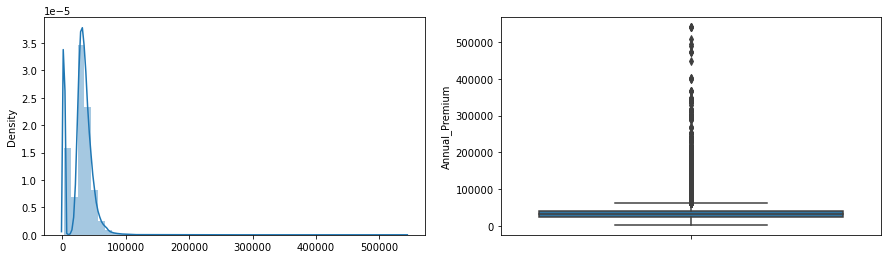

In [342]:
# Annual Premium

plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.distplot(x=data1["Annual_Premium"])

plt.subplot(122)
sns.boxplot(y="Annual_Premium", data=data1)

We had observed earlier too that the "Annual_Premium" data has many outliers and is heavily positively skewed.

We can remove/treat these outliers using the Quantile (IQR) method as we had observed earlier that the proportion of these outliers is not very significant.

In [343]:
Q1 = data1["Annual_Premium"].quantile(0.25)
Q3 = data1["Annual_Premium"].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Create a new column to store the values of the treated values of "Annual_Premium"
data1["Annual_Premium_Treated"] = np.where(data1["Annual_Premium"] > upper_whisker, upper_whisker, data1["Annual_Premium"])

C:\Users\aimee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Annual_Premium_Treated'>

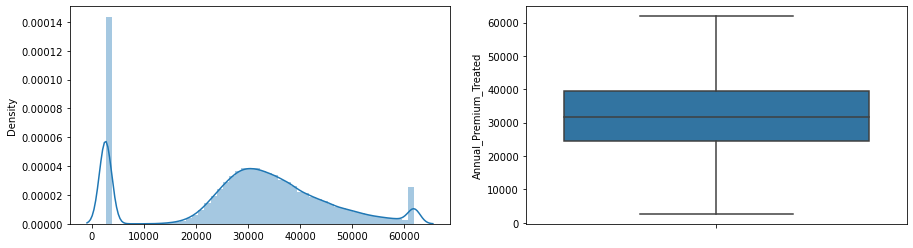

In [344]:
# Let us view the data again.

plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.distplot(x=data1["Annual_Premium_Treated"])

plt.subplot(122)
sns.boxplot(y="Annual_Premium_Treated", data=data1)

The data distribution looks much better now. However, we may still need to scale our data later will be handled later.

We can drop the "Annual_Premium" column from the dataset now since we will be working with "Annual_Premium_Treated" column going forward.

In [349]:
data1 = data1.drop("Annual_Premium", axis=1)

data1.columns

Index(['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Vintage', 'Response', 'Policy_Sales_Channel_Categorical',
       'Region_Code_Categorical', 'Age_Category', 'Annual_Premium_Treated'],
      dtype='object')

C:\Users\aimee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Vintage'>

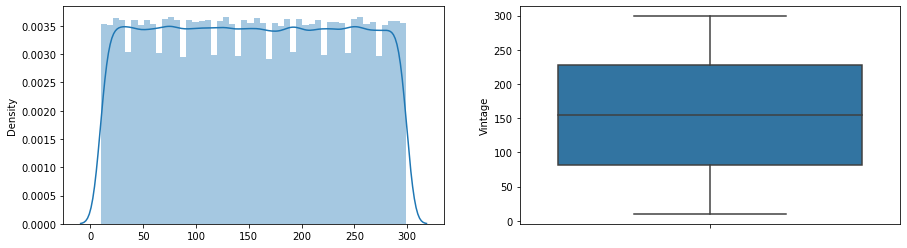

In [345]:
# Vintage

plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.distplot(x=data1["Vintage"])

plt.subplot(122)
sns.boxplot(y="Vintage", data=data1)

There do not seem to be any outliers in the "Vintage" data. Moreover, we have concluded in our hypothesis earlier that "Vintage" follows a normal distribution. We may however need to scale our data which will be handled later.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

One-Hot Encoding:

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

When there is not an ordinal relationship between variables, we use One-Hot Encoding. With One-Hot Encoding the model doesn't assume a natural ordering between categories which may result in poor performance or unexpected results.


In [350]:
# Encode your categorical columns

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Gender                            381109 non-null  object 
 1   Previously_Insured                381109 non-null  int64  
 2   Vehicle_Age                       381109 non-null  object 
 3   Vehicle_Damage                    381109 non-null  object 
 4   Vintage                           381109 non-null  int64  
 5   Response                          381109 non-null  int64  
 6   Policy_Sales_Channel_Categorical  381109 non-null  object 
 7   Region_Code_Categorical           381109 non-null  object 
 8   Age_Category                      381109 non-null  object 
 9   Annual_Premium_Treated            381109 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 29.1+ MB


In [351]:
# We will need to encode all columns with data type as "object" as these are categorical variables which need to be converted to numerical for training our ML model.

cols_to_encode = ["Gender", "Vehicle_Age", "Vehicle_Damage", "Policy_Sales_Channel_Categorical",\
                  "Region_Code_Categorical", "Age_Category"]

# Create a new dataframe with all the encoded features.
data_df = pd.get_dummies(data=data1, columns=cols_to_encode)

data_df.head()

,Previously_Insured,Vintage,Response,Annual_Premium_Treated,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,...,Policy_Sales_Channel_Categorical_Channel_B,Policy_Sales_Channel_Categorical_Channel_C,Policy_Sales_Channel_Categorical_Channel_D,Region_Code_Categorical_Region_A,Region_Code_Categorical_Region_B,Region_Code_Categorical_Region_C,Region_Code_Categorical_Region_D,Age_Category_MiddleAge,Age_Category_OldAge,Age_Category_YoungAge
0,0,217,1,40454.0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
1,0,183,0,33536.0,0,1,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
2,0,27,1,38294.0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
3,1,203,0,28619.0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,1,39,0,27496.0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing - Not Applicable
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

We have already manipulated the following features and created new features earlier.

<div style="text-align: center; font-size: 15px; font-weight: bold;">Feature Manipulation</div>

| Original Dataset Feature | Processed Dataset Feature |
|:-----: | :-----: |
| Id | Feature Dropped |
| Age | Feature Dropped and New Feature Created: Age_Category |
| Driving_License | Feature Dropped |
| Region_Code | Feature Dropped and New Feature Created: Region_Code_Categorical |
| Annual_Premium | Feature Dropped and New Feature Created: Annual_Premium_Treated |
| Policy_Sales_Channel | Feature Dropped and New Feature Created: Policy_Sales_Channel_Categorical |


In [352]:
# Manipulate Features to minimize feature correlation and create new features
data.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response',
       'Policy_Sales_Channel_Categorical', 'Region_Code_Categorical',
       'Age_Category'],
      dtype='object')

In [353]:
data1.columns

Index(['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Vintage', 'Response', 'Policy_Sales_Channel_Categorical',
       'Region_Code_Categorical', 'Age_Category', 'Annual_Premium_Treated'],
      dtype='object')

#### 2. Feature Selection

**Numeric Feature Selection**

Let us use Kendall's correlation between the numerical features viz. "Vintage" and "Annual_Premium_Treated".

Note: We do not use Pearson correlation here as the conditions of normality and linear relationship between the variables is not satisfied.

<AxesSubplot:>

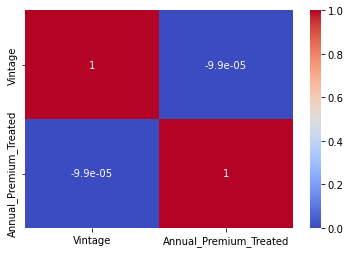

In [356]:
# Select your features wisely to avoid overfitting

numeric_features = ["Vintage", "Annual_Premium_Treated"]

sns.heatmap(data=data1[numeric_features].corr(method="kendall"), cmap="coolwarm", annot=True)

We can see that there is no correlation between these two numerical features, hence we will keep them both in our final dataset.

**Categorical Feature Selection**

Let us see the importance of categorical features using Mutual Information.

To do this, we first need to convert the categorical features into numeric ones.

In [359]:
def make_features_numeric(df):
    global numeric_df
    numeric_df = df.copy()
    numeric_df['Gender'] = numeric_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
    numeric_df['Age_Category'] = numeric_df['Age_Category'].apply(lambda x: 1 if x == 'YoungAge' else 2 if x == 'MiddleAge' else 3)
    numeric_df['Vehicle_Age'] = numeric_df['Vehicle_Age'].apply(lambda x: 1 if x == '< 1 Year' else 2 if x == '1-2 Year' else 3)
    numeric_df['Vehicle_Damage'] = numeric_df['Vehicle_Damage'].apply(lambda x: 1 if x == 'Yes' else 0)
    numeric_df['Policy_Sales_Channel_Categorical'] = numeric_df['Policy_Sales_Channel_Categorical'].apply(lambda x: 1 if x == 'Channel_A' else 2 if x == 'Channel_B' else 3 if x=='Channel_C' else 4)
    numeric_df['Region_Code_Categorical'] = numeric_df['Region_Code_Categorical'].apply(lambda x: 1 if x == 'Region_A' else 2 if x == 'Region_B' else 3 if x == 'Region_C' else 4)

make_features_numeric(data1)

**Mutual Information**

Mutual information is a concept from information theory that measures the amount of information obtained about one random variable through the observation of another random variable. In the context of feature importance in machine learning, mutual information is used to quantify the relationship between a feature and the target variable.

In feature importance analysis, mutual information can be calculated to assess how much information a particular feature provides about the target variable. Features with high mutual information values are considered more informative and may be more relevant for predicting the target variable.

In [ ]:
def mutual_info(df):
    X = df.copy()
    y = X.pop("Response")
    X.drop(columns = ['Annual_Premium_Treated','Vintage_Treated'], inplace = True)
    
    x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

    high_score_features = []
    feature_scores = mutual_info_classif( x_train, y_train,  random_state=0)

    column_score = {}
    columns = []
    scores = []
    for score, f_name in sorted(zip(feature_scores, x_train.columns), reverse=True):
        columns.append(f_name)
        scores.append(score)
        high_score_features.append(f_name)

    column_score['Feature'] = columns
    column_score['Score'] = scores

    return pd.DataFrame(data = column_score)

def show_feature_importance_through_mi(df):
    sns.barplot(data = mutual_info(df), x = 'Feature', y='Score')
    plt.title('Feature Importance Using Mutual Information', fontdict={'fontsize':22,'fontweight':'bold'})
    plt.xlabel('Features', fontdict={'fontsize':18})
    plt.ylabel('Score', fontdict={'fontsize':18})
    plt.xticks(rotation=90)

show_feature_importance_through_mi(numeric_df)

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***